# n-Armed Bandit Problem
Based on:
- https://github.com/Curt-Park/reinforcement_learning_an_introduction/blob/master/ch02_multi-armed_bandits/multi-armed_bandits.ipynb  
- Reinforcement Learning: An Introduction R. Sutton, and A. Barto. The MIT Press, Second edition, (2018)
- DSS_RL.pptx

In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120

## Stationary problem
### Reward distribution

In [155]:
N_arm = 10
n_step = 3000 # Number of steps in one game
def generate_rewards(N_arm, n_step):
    q_star = np.random.normal(0, 1, N_arm) # stationary expected values
    Rewards = []
    for a in q_star:
        Rewards.append(np.random.normal(a, 1, n_step))
    Rewards = np.transpose(Rewards)
    return Rewards

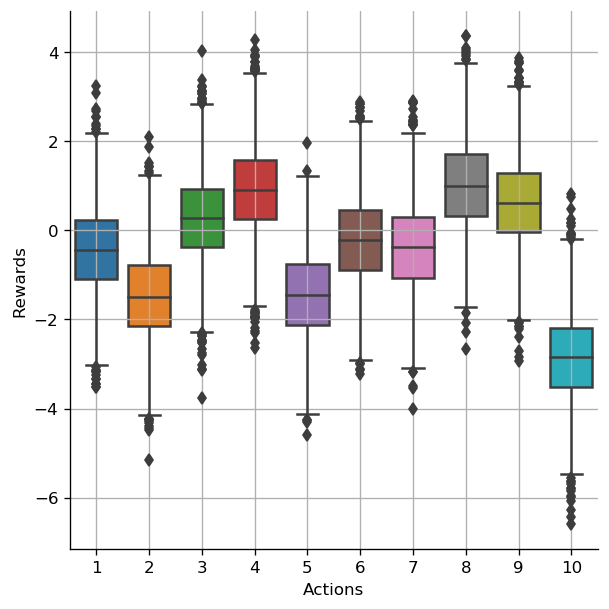

In [156]:
df = pd.DataFrame(generate_rewards(N_arm, n_step))
Reward_dist_plot = sns.catplot(data=df, kind="box")
x = plt.xlabel("Actions")
y = plt.ylabel("Rewards")
plt.grid(True)
actions_lables = Reward_dist_plot.set(xticklabels=np.arange(1,N_arm+1))

### $\epsilon$ - greedy algorithm

In [157]:
q_star = np.random.normal(0, 1, N_arm) # stationary expected values
def play_one_game(q_star, N_arm, n_step):
    epsilon = 0.1
    # Initialize
    Start_Q_value = 0
    Q = Start_Q_value*np.ones(N_arm)
    N = np.zeros(N_arm)
    
    reward = np.zeros(n_step)
    for step in range(0, n_step): # replace to n_step
        greedy_action = np.argmax(Q)
        random_action = np.random.randint(0, N_arm-1)
        a = np.random.choice([greedy_action, random_action], p=[1-epsilon, epsilon])
        reward[step] = np.random.normal(q_star[a], 1)
        N[a] += 1
        Q[a] += (1/N[a])*(reward[step] - Q[a])
        #print(N)
    average_reward = reward
    return average_reward

In [ ]:
N_games = 2000
avg_rew = []
for game in range(N_games):
   avg_rew.append(play_one_game(q_star, N_arm, n_step))


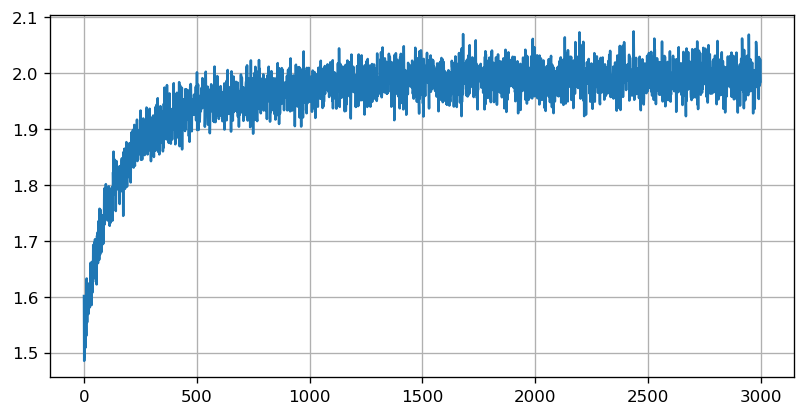

In [160]:
pl = plt.plot(np.mean(avg_rew,axis=0))
plt.grid(True)